# Exercice 1

Nous allons étudier la suite définie par

$$ u_{n+1} = f(u_n), \quad n\geq0,$$

où la donnée initiale $u_0$ est un réel de $[0, 1]$ et la fonction $f$ est définie par

$$ f(x) = ax(1-x),$$

pour $a$ un réel donné.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 150
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

UPS_primary = (0.38823529411764707, 0.0, 0.23529411764705882)
UPS_gris = (0.19215686274509805, 0.24313725490196078, 0.2823529411764706)
UPS_bleu = (0.0, 0.3058823529411765, 0.49019607843137253)
UPS_orange = (0.9333333333333333, 0.20392156862745098, 0.13725490196078433)
UPS_vert = (0.0, 0.5019607843137255, 0.47843137254901963)

:::{admonition} Questions
:class: admonition-exercice
* Complétez la fonction `f(x, a)` qui prend en argument deux doubles `x` et `a` et qui retourne la valeur de la fonction $f(x, a)=ax(1-x)$.
* Proposez une fonction `suite(u0, a, N)` qui prend en argument deux doubles `u0` et `a` et un entier `N` et qui retourne un `ndarray` contenant les termes de la suite $u_0, \ldots, u_N$.
:::

In [2]:
def f(x, a):
    """
    la fonction dont on cherche les points fixes
    
    Parameters
    ----------
    
    x: double
    a: double
    
    Returns
    -------
    
    out: double
        out = ax(1-x)
    """
    return a*x*(1-x)

def suite(u0, a, N):
    """
    calcule les N+1 premiers termes de la suite u_0, ..., u_N
    définis par u_{n+1} = f(u_n, a), n>=0
    
    Parameters
    ----------
    
    u0: double
        premier terme de la suite
    a: double
        valeur du paramètre de la fonction f
    N: int
        nombre de termes calculés
        
    Returns
    -------
    
    out: ndarray
        les termes u_0, ..., u_N
    """
    u = np.zeros((N+1,))
    u[0] = u0
    for k in range(N):
        u[k+1] = f(u[k], a)
    return u

:::{admonition} Questions
:class: admonition-exercice
* Calculez les $N=20$ premiers termes des suites pour les paramètres $u_0=0.77$ et $a\in\lbrace 0.5, 1, 2, 2.5, 3.3, 3.5 \rbrace$.
* Affichez tous les termes calculés selon le format suivant
```
----------------------------------------------------------------
  a=0.5      a=1.0      a=2.0      a=2.5      a=3.3      a=3.5    
----------------------------------------------------------------
 0.77000    0.77000    0.77000    0.77000    0.77000    0.77000   
 0.08855    0.17710    0.35420    0.44275    0.58443    0.61985   
 0.04035    0.14574    0.45748    0.61681    0.80148    0.82473   
 0.01936    0.12450    0.49638    0.59089    0.52507    0.50594   
 0.00949    0.10900    0.49997    0.60435    0.82293    0.87488   
 0.00470    0.09712    0.50000    0.59778    0.48087    0.38314   
 ...        ...        ...        ...        ...        ...     
----------------------------------------------------------------
```
:::

In [3]:
u0 = 0.77
N = 20
liste_u = []
liste_a = [0.5, 1, 2, 2.5, 3.3, 3.5]
ndigits = 5

for a in liste_a:
    liste_u.append(suite(u0, a, N))

taille = ndigits+6
tailletot = taille*len(liste_a)
fmt = f"^{taille}.{ndigits}f"
fmtup = f"^{taille}"
print("-"*tailletot)
for a in liste_a:
    msgup = f"a={a:3.1f}"
    print(f"{msgup:{fmtup}}", end="")
print("\n" + "-"*tailletot)
for n in range(N):
    for k in range(len(liste_a)):
        print(f"{liste_u[k][n]:{fmt}}", end="")
    print("")
print("-"*tailletot)

------------------------------------------------------------------
   a=0.5      a=1.0      a=2.0      a=2.5      a=3.3      a=3.5   
------------------------------------------------------------------
  0.77000    0.77000    0.77000    0.77000    0.77000    0.77000  
  0.08855    0.17710    0.35420    0.44275    0.58443    0.61985  
  0.04035    0.14574    0.45748    0.61681    0.80148    0.82473  
  0.01936    0.12450    0.49638    0.59089    0.52507    0.50594  
  0.00949    0.10900    0.49997    0.60435    0.82293    0.87488  
  0.00470    0.09712    0.50000    0.59778    0.48087    0.38314  
  0.00234    0.08769    0.50000    0.60110    0.82379    0.82720  
  0.00117    0.08000    0.50000    0.59945    0.47902    0.50029  
  0.00058    0.07360    0.50000    0.60028    0.82355    0.87500  
  0.00029    0.06818    0.50000    0.59986    0.47955    0.38281  
  0.00015    0.06353    0.50000    0.60007    0.82362    0.82694  
  0.00007    0.05950    0.50000    0.59997    0.47939    0.500

Afin de mieux comprendre le comportement de la suite selon les valeurs du paramètre $a$, nous proposons de faire une illustration graphique de la suite.

:::{admonition} Questions
:class: admonition-exercice
* Créez une fenêtre graphique de taille $(12, 18)$ composée de $2\times3$ axes : chaque axe sera dédié à une valeur particulière du paramètre $a$. Vous prendrez $a\in\lbrace 0.5, 1, 2, 2.5, 3.3, 3.5\rbrace$.
* Sur chacun de ces axes, tracez la fonction $x\mapsto f(x, a)$ en bleu, la première bissectrice $x\mapsto x$ en vert.
* Créez une fonction `u_graph(u)` qui prend en argument un `ndarray` `u` de taille $N+1$ (qui sera obtenu comme les termes de la suite $u_0, \ldots, u_N$) et qui retourne 2 `ndarray` notés `px` et `py` de taille $2N+1$ définis par

$$
\left\vert \begin{aligned}
p_{x,2i} &= u_i, && 0\leq i \leq N,\\
p_{x,2i+1} &= u_i, && 0\leq i < N,
\end{aligned}\right.
\qquad
\left\vert \begin{aligned}
p_{y,0} &= 0, \\
p_{y,2i} &= u_i, && 0< i \leq N,\\
p_{y,2i+1} &= u_{i+1}, && 0\leq i < N,
\end{aligned}\right.
$$

* Ajoutez au graphique précédent la ligne brisée dont les points ont pour abscisses $p_x$ et pour ordonnées $p_y$.
* Que pouvez-vous dire du comportement de la suite ?
:::

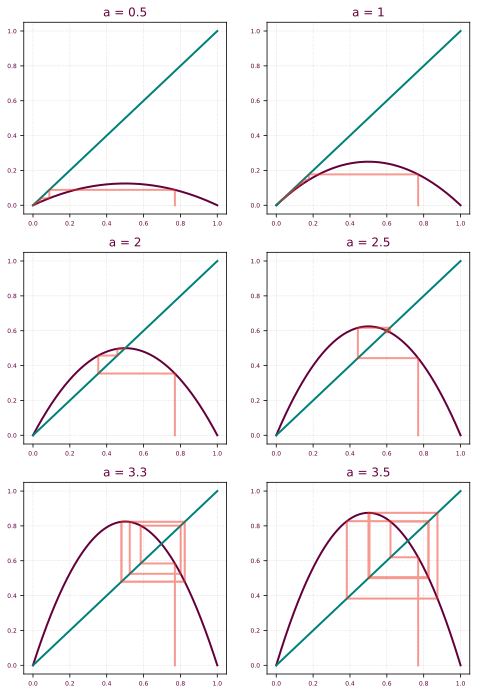

In [4]:
def u_graph(u):
    px = np.repeat(u, 2)
    py = px[1:].copy()
    px = px[:-1]
    py[0] = 0
    return px, py

fig = plt.figure(figsize=(8, 12))
xx = np.linspace(0, 1, 1025)
for k, a in enumerate(liste_a):
    ax = fig.add_subplot(3, 2, k+1)
    ax.grid(True, linewidth=.5, alpha=.75, linestyle='dotted')
    ax.plot(xx, f(xx, a), lw=2, color=UPS_primary)
    ax.plot(xx, xx, lw = 2, color=UPS_vert)
    px, py = u_graph(suite(u0, a, 50))
    ax.plot(px, py, lw=2, color=UPS_orange, alpha=0.5)
    ax.set_title(f"a = {a}", color=UPS_primary)
    ax.tick_params(
        labelsize=6, labelcolor=UPS_primary
    )

:::{admonition} Questions
:class: admonition-exercice
Une autre représentation possible est simplement de tracer les valeurs de la suite $u_n$ en fonction de $n$. 

* Dans une fenêtre graphique découpée en 6 axes (un pour chaque valeur de $a\in\lbrace 0.5, 1, 2, 2.5, 3.3, 3.5\rbrace$), tracez le nuage de points $(n, u_n)$ pour $0\leq n\leq 50$.
* Ajoutez les lignes horizontales suivantes sur chaque graphique $x\mapsto l_{a,k}$ avec

$$
\begin{aligned}
&l_{0.5, 0} = 0, &&l_{1, 0} = 0,\\
&l_{2, 0} = 0.5, &&l_{2.5, 0} = 0.6,\\
&l_{3.3, 0} = 0.47942701982423414, &&l_{3.3, 1} = 0.8236032832060689,\\
&l_{3.5, 0} = 0.3828203125, &&l_{3.5, 1} = 0.5008828125,\\
&l_{3.5, 2} = 0.8269453125, &&l_{3.5, 3} = 0.8749921875.
\end{aligned}
$$

* Pouvez-vous expliquer certaines (ou toutes) les valeurs numériques proposées dans le sujet ?

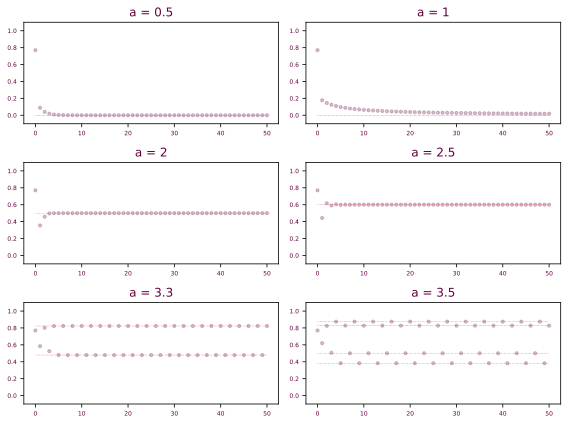

In [5]:
def compute_limite(a):
    if a == 0.5:
        return [0]
    if a == 1:
        return [0]
    if a == 2:
        return [0.5]
    if a == 2.5:
        return [0.6]
    if a == 3.3:
        return [0.47942701982423414, 0.8236032832060689]
    if a == 3.5:
        return [
            0.3828203125, 0.5008828125,
            0.8269453125, 0.8749921875
        ]
    return None

N = 50
liste_a = [0.5, 1, 2, 2.5, 3.3, 3.5]
fig = plt.figure(figsize=(8, 6))
xx = np.linspace(0, 1, 1025)
n = np.arange(N+1)
for k, a in enumerate(liste_a):
    ax = fig.add_subplot(3, 2, k+1)
    ax.grid(False)
    u = suite(u0, a, N)
    ax.scatter(n, u, color=UPS_primary, alpha=0.25, s=10)
    l = compute_limite(a)
    for lk in l:
        ax.plot([0, N], [lk]*2, linestyle='dotted', linewidth=.5, color=UPS_orange)
    ax.set_title(f"a = {a}", color=UPS_primary)
    ax.set_ylim(-0.1, 1.1)
    ax.tick_params(
        labelsize=6, labelcolor=UPS_primary
    )
    fig.tight_layout()